# This is the inital exploration of the college scorecard dataset.


"The College Scorecard project is designed to increase transparency, putting the power in the hands of students and families to compare how well individual postsecondary institutions are preparing their students to be successful. This project provides data to help students and families compare college costs and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and educational goals." The full data documentation can be found in the following link > https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf

This will be the initial exploration of the data which includes cleaning the data, sectioning data into relevant dataframes, as well as finding initial estimates of location (mean/median/mode), and some estimates of variability.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv")

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,9,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1379,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1412,1413,1427,1428,1431,1432,1433,1517,1532,1533,1534,1535,1536,1537,1538,1539,1540,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1567,1568,1573,1574,1575,1576,1577,1581,1582,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1604,1605,1606,1608,1610,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1

In [3]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,FEDSCHCD,BOOKSUPPLY,ROOMBOARD_ON,OTHEREXPENSE_ON,ROOMBOARD_OFF,OTHEREXPENSE_OFF,OTHEREXPENSE_FAM,ENDOWBEGIN,ENDOWEND,DOLPROVIDER
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,001002,1600.0,9240.0,3090.0,9240.0,3090.0,3090.0,NaN,NaN,0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://uab.studentaidcalculator.com/survey.aspx,...,001052,1200.0,12307.0,5555.0,12307.0,5555.0,5555.0,524675419.0,537349307.0,0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,016885,900.0,NaN,NaN,9600.0,1600.0,1600.0,174804.0,174805.0,0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,001055,2120.0,10400.0,3994.0,10400.0,3994.0,3994.0,79465021.0,77250279.0,1
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,001005,1600.0,6050.0,3392.0,7320.0,4228.0,4228.0,99638681.0,94536751.0,0


In [4]:
# Look at the shape of the dataframe
df.shape

(6694, 2392)

In [12]:
#Select relevant columns
master_df = df[["UNITID", "INSTNM", "STABBR", "ZIP", "CITY", "ICLEVEL", "HIGHDEG",
                "COSTT4_A", "TUITIONFEE_IN", "TUITIONFEE_OUT"]]

In [13]:
# Drop all data that is above 1 in ICLEVEL to select only 4-year universities
#master_df.drop(master_df[master_df.ICLEVEL > 1].index, inplace=True)

In [14]:
#Check null data
master_df.isnull().sum()

UNITID               0
INSTNM               0
STABBR               0
ZIP                  0
CITY                 0
ICLEVEL              0
HIGHDEG              0
COSTT4_A          3333
TUITIONFEE_IN     2858
TUITIONFEE_OUT    3120
dtype: int64

In [18]:
master_df[master_df.isnull().any(axis=1)]

,UNITID,INSTNM,STABBR,ZIP,CITY,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
7,100812,Athens State University,AL,35611,Athens,1,4,NaN,NaN,NaN
17,101277,New Beginning College of Cosmetology,AL,35951,Albertville,3,1,NaN,NaN,NaN
54,102395,United States Sports Academy,AL,36526-7055,Daphne,1,4,NaN,NaN,NaN
61,102711,Alaska Vocational Technical Center,AK,99664-0889,Seward,3,1,NaN,NaN,NaN
63,103501,Alaska Career College,AK,99507-1033,Anchorage,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6689,48511113,Georgia Military College - Eastman,GA,310236109,Eastman,1,0,NaN,6165.0,NaN
6690,48616901,American College of Barbering - Florence,KY,410421801,Florence,3,0,NaN,NaN,NaN
6691,49005401,HCI College - Fort Lauderdale Campus,FL,33309,Fort Lauderdale,2,0,NaN,19404.0,NaN
6692,49146401,ABC Adult School - Cabrillo Lane,CA,907037748,Cerritos,3,0,NaN,NaN,NaN


In [19]:
#drop rows that have NA values
master_df.dropna(how='any', inplace=True)

<ipython-input-19-29dcb523820d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df.dropna(how='any', inplace=True)


In [20]:
master_df.shape

(3361, 10)

In [21]:
#look at descriptive statistics
master_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNITID,3361.0,223847.618863,106423.490912,100654.0,155414.0,196583.0,232195.0,494852.0
ICLEVEL,3361.0,1.358822,0.513873,1.0,1.0,1.0,2.0,3.0
HIGHDEG,3361.0,3.065457,0.956743,0.0,2.0,3.0,4.0,4.0
COSTT4_A,3361.0,27548.361500,16379.050764,4108.0,14272.0,22731.0,36828.0,78555.0
TUITIONFEE_IN,3361.0,16208.073193,14409.439170,480.0,4995.0,10873.0,23628.0,61788.0
TUITIONFEE_OUT,3361.0,19636.490628,13281.060928,480.0,8994.0,15498.0,27756.0,61788.0


# Questions of interest

- What is the average cost of attendance in the US?
    - Repeat for community college, 4-year university, private, and public.
- Write function that will allow the user to select a state of interest and output the mean, trimmed mean, median, mode, standard deviation, and percentile within the US.
    - Include output for community college and 4-year university, private and public.

In [23]:
master_df.head()

,UNITID,INSTNM,STABBR,ZIP,CITY,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
0,100654,Alabama A & M University,AL,35762,Normal,1,4,23053.0,10024.0,18634.0
1,100663,University of Alabama at Birmingham,AL,35294-0110,Birmingham,1,4,24495.0,8568.0,20400.0
2,100690,Amridge University,AL,36117-3553,Montgomery,1,4,14800.0,6950.0,6950.0
3,100706,University of Alabama in Huntsville,AL,35899,Huntsville,1,4,23917.0,11122.0,23518.0
4,100724,Alabama State University,AL,36104-0271,Montgomery,1,4,21866.0,11068.0,19396.0


In [24]:
# US mean
master_df["COSTT4_A"].mean()

27548.361499553703

In [25]:
#US trimmed mean
from scipy.stats import trim_mean

trim_mean(master_df["COSTT4_A"], 0.1)

25264.198958720714

In [26]:
# US Median
master_df["COSTT4_A"].median()

22731.0

In [27]:
deg_df = master_df.groupby("HIGHDEG").mean()
deg_df.head()

,UNITID,ICLEVEL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
HIGHDEG,,,,,
0,400468.000000,1.000000,19666.800000,10302.000000,10302.000000
1,338046.557692,2.538462,23896.384615,13720.557692,14082.692308
2,220545.121683,1.956084,15533.710887,5969.685270,9745.392498
3,246054.531300,1.001605,29196.020867,18352.268058,20161.142857
4,208883.381510,1.000000,35702.485677,22811.560547,26868.508464


- The average cost of attendance for one year in all higher ed institutions in the US is 27,548 dollars.
- Associates degree is 15,553 dollars.
- Bachelors degree is 29,196 dollars.
- Graduate degree is 35,702 dollars.

* The average cost for attendance  for 4 years in all higher ed institutions in the US is 110,192 USD
* Associates degree: 31,106 USD (2 years)
* Bachelors degree: 116,784 USD (4 years
* Graduate Degree: 71,404 USD (2 years)

## Estimates of Variability (Dispersion Metrics)

**Deviations**: The difference between observed values and the estimate of location. Also called Errors of Residuals

**Variance**: Square the deviations from the mean, divide by n-1 where n is the number of instances

In [28]:
#What is the variance in the cost of attendance?
from statistics import variance

variance(master_df["COSTT4_A"])

268273303.94100535

In [29]:
#Standard deviation
from statistics import stdev

stdev(master_df["COSTT4_A"])

16379.050764345453

In [30]:
# Mean absolute deviation

np.mean(np.absolute(master_df["COSTT4_A"] - np.mean(master_df["COSTT4_A"])))

13176.296392781627

In [31]:
# Median absolute deviation

np.median(np.absolute(master_df["COSTT4_A"] - np.median(master_df["COSTT4_A"])))

9522.0

In [32]:
# interquartile range

q3, q1 = np.percentile(master_df["COSTT4_A"], [75, 25])
iqr = q3 - q1
iqr

22556.0

## Exploring the Data Distribution

In [ ]:
#Percentiles and boxplots

cost_df.boxplot(column="COSTT4_A", by=None, ax=None)

#Data looks positively skewed

In [ ]:
# Frequency plot

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    master_df['COSTT4_A'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Cost of Attendance ($)', ylabel='Count');

## Exploring Binary and Categorical Data

In [ ]:
# Mode

master_df['COSTT4_A'].mode()

Text(0.5, 0, 'Cost of Attendance')

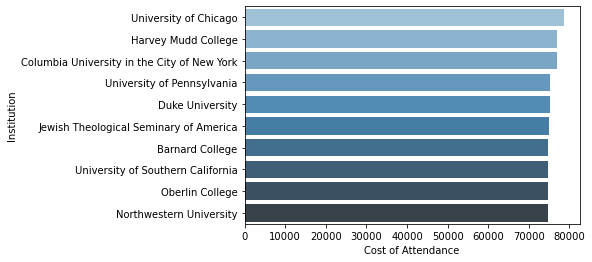

In [33]:
# Bar Plot- plotting top 10 most expensive institutions

top10high = master_df.nlargest(n=10, columns=["COSTT4_A"])

ax = sns.barplot(data=top10high, y="INSTNM", x="COSTT4_A", orient="h", palette="Blues_d")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")

Text(0.5, 0, 'Cost of Attendance')

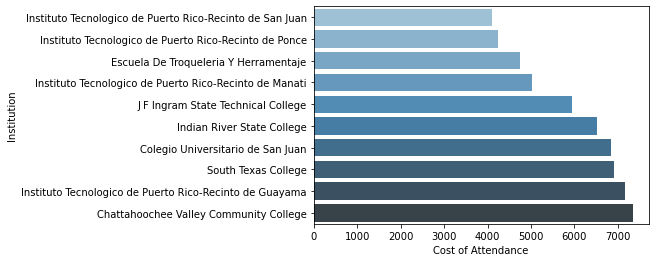

In [34]:
# Plotting the 10 least expensive institutions

top10low = master_df.nsmallest(n=10, columns=["COSTT4_A"])

ax = sns.barplot(data=top10low, y="INSTNM", x="COSTT4_A", orient="h", palette="Blues_d")
ax.set_ylabel("Institution")
ax.set_xlabel("Cost of Attendance")

# Correlation

In [35]:
# Correlation matrix

master_df.corr()

,UNITID,ICLEVEL,HIGHDEG,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT
UNITID,1.000000,0.069697,-0.133809,-0.083823,-0.079314,-0.161371
ICLEVEL,0.069697,1.000000,-0.874095,-0.472546,-0.452059,-0.493683
HIGHDEG,-0.133809,-0.874095,1.000000,0.503952,0.473637,0.543742
COSTT4_A,-0.083823,-0.472546,0.503952,1.000000,0.975344,0.925624
TUITIONFEE_IN,-0.079314,-0.452059,0.473637,0.975344,1.000000,0.929275
TUITIONFEE_OUT,-0.161371,-0.493683,0.543742,0.925624,0.929275,1.000000


- It seems that the cost of attendance has a strong correlation with in state and out of state tuition

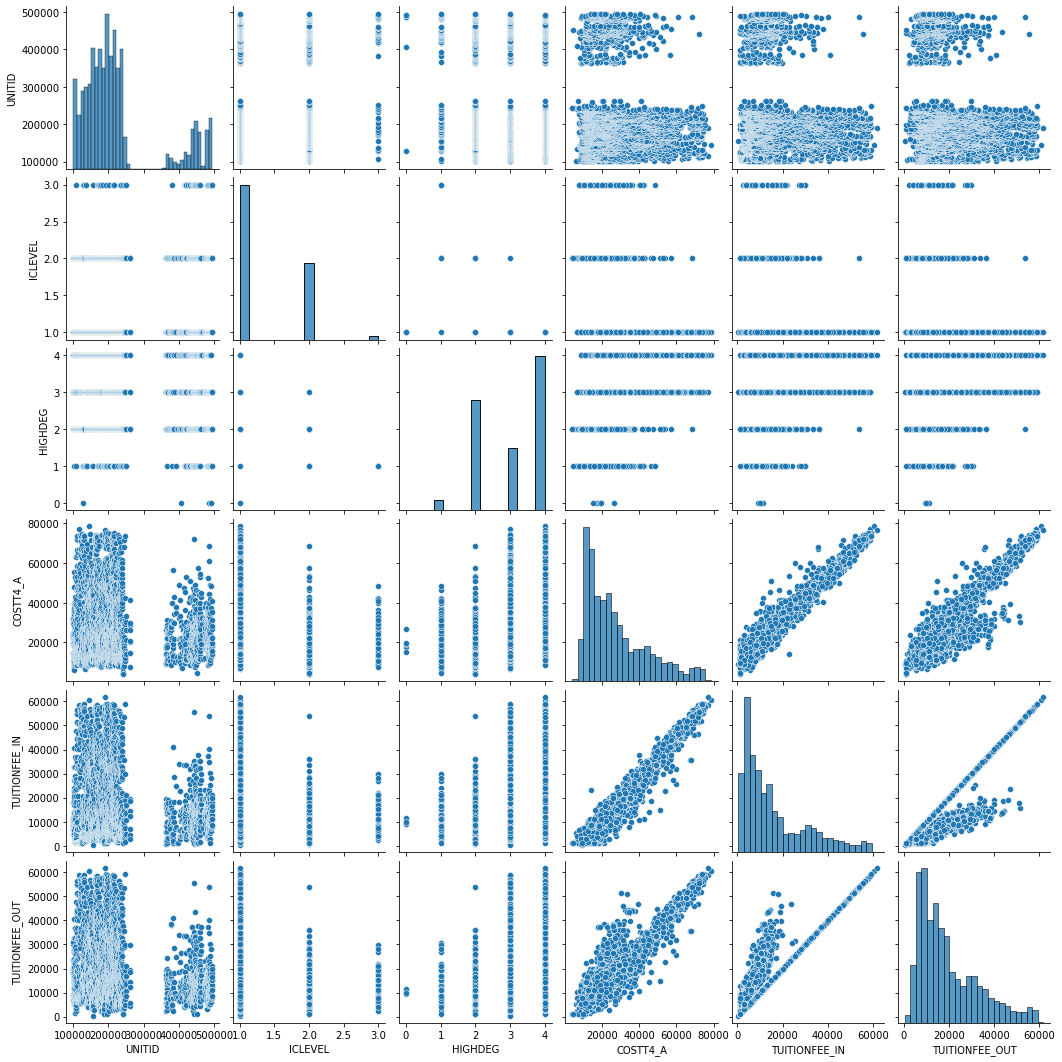

In [36]:
# Scatterplot

sns.pairplot(data=master_df)

- Strong correlation between in-state/out-state tuition and cost of attendance

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='COSTT4_A', ylabel='TUITIONFEE_IN'>

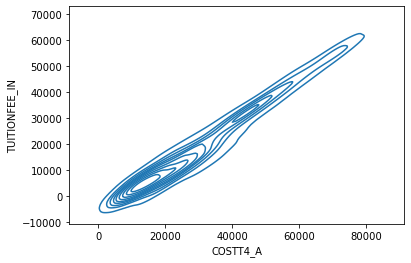

In [37]:
# Contour plot

ax = sns.kdeplot(master_df["COSTT4_A"], master_df["TUITIONFEE_IN"])
ax

<AxesSubplot:xlabel='COSTT4_A'>

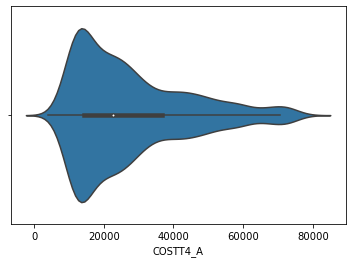

In [38]:
# Violin plot

sns.violinplot(x=master_df["COSTT4_A"])

In [39]:
# Export cleaned df for further analysis
master_df.to_csv("cleaned_cost_data", index=False)